In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [3]:
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

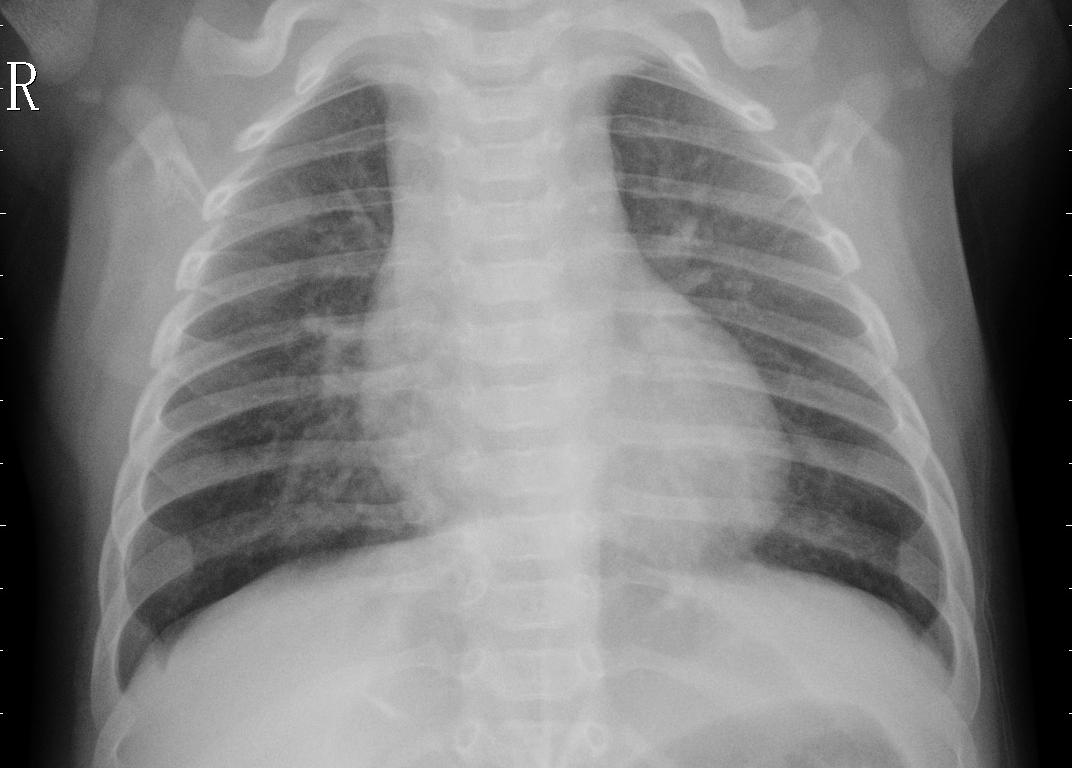

In [5]:
image = PIL.Image.open('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg')
image

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
training_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/'
training_generator = ImageDataGenerator(rescale=1/255)
data_train = training_generator.flow_from_directory(training_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 5216 images belonging to 2 classes.


In [58]:
validation_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/'
validation_generator = ImageDataGenerator(rescale=1/255)
data_valid = validation_generator.flow_from_directory(validation_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 16 images belonging to 2 classes.


In [59]:
testing_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/'
testing_generator = ImageDataGenerator(rescale=1/255)
data_test = testing_generator.flow_from_directory(testing_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 624 images belonging to 2 classes.


In [63]:
#building CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), input_shape=(120,120,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
                            ])

In [64]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 59, 59, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 28, 28, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 13, 13, 128)      

In [66]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
history = model.fit_generator(data_train, epochs=2, validation_data=data_valid)

Epoch 1/2


/tmp/ipykernel_43/1423788013.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_train, epochs=2, validation_data=data_valid)


652/652 [==============================] - 108s 164ms/step - loss: 0.4575 - accuracy: 0.8018 - val_loss: 1.0684 - val_accuracy: 0.5625
Epoch 2/2
652/652 [==============================] - 106s 163ms/step - loss: 0.1927 - accuracy: 0.9266 - val_loss: 0.3668 - val_accuracy: 0.8125


In [68]:
model.evaluate(data_test)

78/78 [==============================] - 10s 130ms/step - loss: 0.4898 - accuracy: 0.8173


[0.48983779549598694, 0.817307710647583]

In [69]:
predictions = model.predict(data_test)

78/78 [==============================] - 7s 90ms/step


In [70]:
predictions

array([[9.9972564e-01],
       [2.4202906e-01],
       [3.5939181e-01],
       [1.5419973e-01],
       [9.9958909e-01],
       [1.7919123e-02],
       [9.9964374e-01],
       [9.8670501e-01],
       [9.9977267e-01],
       [1.8236461e-01],
       [9.2228776e-01],
       [9.5193511e-01],
       [5.0415047e-03],
       [9.4074041e-01],
       [9.9980897e-01],
       [9.9982148e-01],
       [9.9911958e-01],
       [6.7408282e-01],
       [9.9535620e-01],
       [9.1092521e-01],
       [9.9990141e-01],
       [3.3979408e-02],
       [9.2847586e-01],
       [9.9828941e-01],
       [9.5401990e-01],
       [9.6406275e-01],
       [9.9936330e-01],
       [9.9759138e-01],
       [8.0576843e-01],
       [9.9674457e-01],
       [8.4139597e-01],
       [9.9761474e-01],
       [9.0973830e-01],
       [9.9351567e-01],
       [9.9907446e-01],
       [9.9953890e-01],
       [9.8418188e-01],
       [9.7922343e-01],
       [9.9979711e-01],
       [9.8688358e-01],
       [9.9994165e-01],
       [9.979402

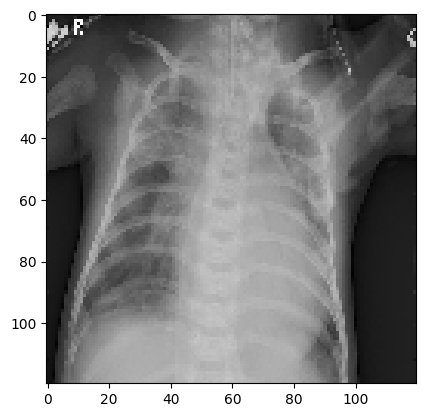

Pneumonia Probability is:  [0.99972564]


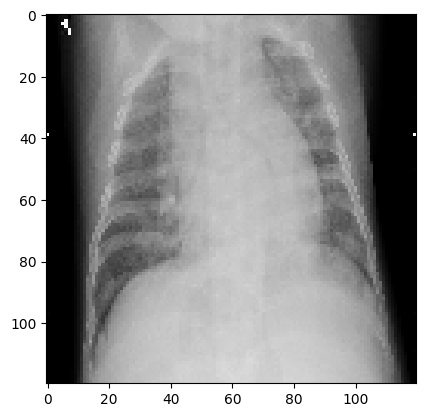

Pneumonia Probability is:  [0.99972564]


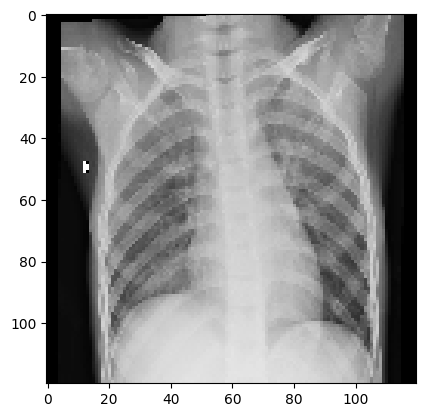

Pneumonia Probability is:  [0.99972564]


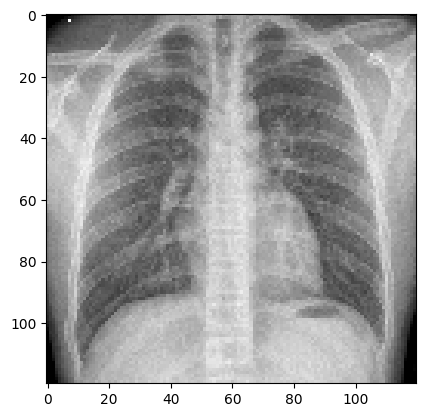

Pneumonia Probability is:  [0.99972564]


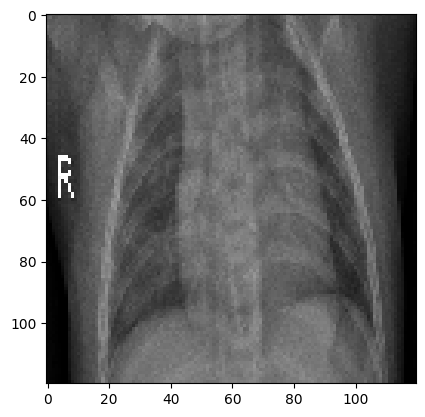

Pneumonia Probability is:  [0.99972564]


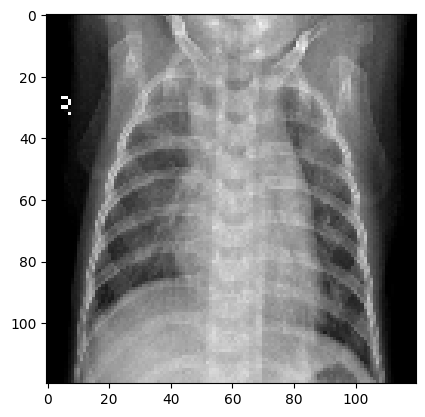

Pneumonia Probability is:  [0.99972564]


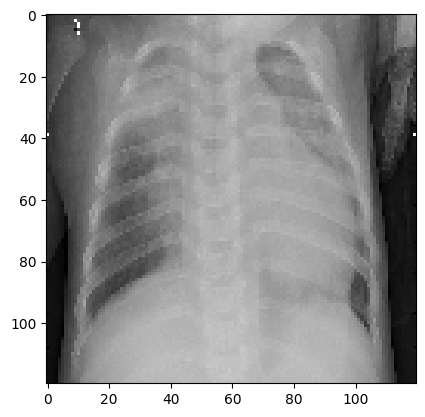

Pneumonia Probability is:  [0.99972564]


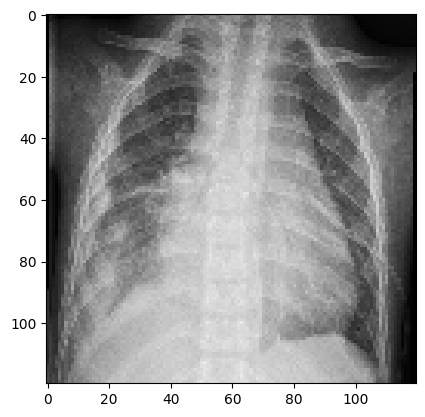

Pneumonia Probability is:  [0.99972564]


IndexError: index 8 is out of bounds for axis 0 with size 8

In [71]:
x = data_test.next()
for i in range(0,1):
    image = x[i]
    for j in range (0,16):
        plt.imshow(image[j])
        plt.show()
        print("Pneumonia Probability is: ", predictions[i])
    